<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Что такое Colaboratory?</h1>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- вы получаете бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Это отличное решение для <strong>студентов</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите <a href="https://www.youtube.com/watch?v=inN8seMm7UI">ознакомительное видео</a> или начните работу с инструментом ниже.

In [228]:
import random
import math
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/toyota.csv', delimiter=';')
print(data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [229]:
data.shape

(6738, 9)

In [230]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [231]:
unique_values_data = pd.DataFrame(data.select_dtypes(include=['object']).copy().apply(pd.unique))
unique_values_data

,0
model,"[ GT86, Corolla, RAV4, Yaris, Auris, Aygo..."
transmission,"[Manual, Automatic, Semi-Auto, Other]"
fuelType,"[Petrol, Other, Hybrid, Diesel]"


In [232]:
dropedna_data = data.dropna()
dropedna_data = dropedna_data.apply(lambda x:  pd.to_numeric(x, errors = 'ignore'))

In [233]:
def _color_red_or_green(val):
    color = 'red' if abs(val) < 0.25 else 'green'
    return 'color: %s' % color

In [234]:
dropedna_data.corr().style.applymap(_color_red_or_green)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


In [235]:
data = data.drop(['tax', 'mpg'], axis = 1)
data.shape

(6738, 7)

In [236]:
category_data = data.select_dtypes(include=['object']).copy()
data = data.drop(list(category_data.columns), axis = 1)
category_data.head()

,model,transmission,fuelType
0,GT86,Manual,Petrol
1,GT86,Manual,Petrol
2,GT86,Manual,Petrol
3,GT86,Manual,Petrol
4,GT86,Manual,Petrol


In [237]:
category_data = pd.get_dummies(category_data, columns = ['model', 'transmission', 'fuelType'])
category_data.head()

,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [238]:
category_data.shape

(6738, 26)

In [239]:
data = pd.concat([category_data, data], axis = 1)
data.shape

(6738, 30)

In [247]:
data.loc[(data.year > 3), 'year'] = data.year / 10000
data.loc[(data.mileage > 3), 'mileage'] = data.mileage / 100000
data.loc[(data.engineSize > 0.99), 'engineSize'] = data.engineSize / 10
data.loc[(data.price > 500), 'price'] = data.price / 1000
data.T

,0,1,2,3,4,5,6,7,8,9,...,6728,6729,6730,6731,6732,6733,6734,6735,6736,6737
model_ Auris,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ Avensis,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ Aygo,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ C-HR,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ Camry,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ Corolla,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ GT86,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ Hilux,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000
model_ IQ,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,1.00000,1.00000,1.00000,1.0000,1.00000,1.0000,0.00000,0.0000,0.0000,0.00000
model_ Land Cruiser,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000


In [241]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [242]:
k = int((X).shape[0]*0.7)
X_train = np.array(X[:k])
Y_train = np.array(y[:k])
X_test = np.array(X[k+1:])
Y_test = np.array(y[k+1:])
print(X.shape[1])

29


In [243]:

w56 = b1 = np.zeros((1,29))
print(w56.shape)

(1, 29)


In [244]:
# общая функция 
def neural(parameters, X, Y, num_iterations, learning_rate):
    costs = []
    p = []
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations):
      for j in range(len(X_train)):
        # Вычисление градиента и функции стоимости
        m = w1.shape[1]
        Z = np.matmul(X[j], w1) + b1
        A = np.sum(w2*Z) + b2
        cost = math.sqrt((A-Y[j]) ** 2)
        
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw1 = X[j].reshape(X.shape[1],1)*w2*(A-Y[j])/cost
        dw2 = Z*(A-Y[j])/cost
        db1 = w2*(A-Y[j])/cost
        db2 = (A-Y[j])/cost
        #if j<10 and i == num_iterations-1:
          #print(w)
          #print('Min w1= ', min(w1), '    Min w2= ', min(w2))
          #print('Max w1= ', max(w1), '    Max w2= ', max(w2))
          #print('Min b1= ', min(b1), '    Max b1= ', max(b1), '   b2= ', b2)
        
        # обновление весов
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b1 -= learning_rate * db1
        b2 -= learning_rate * db2
        
      if i % 10 == 0:
            costs.append(cost)
            p.append(i)
        
      if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w1": w1,
              "w2": w2,
              "b1": b1,
              "b2": b2}
    
    grads = {"dw1": dw1,
             "dw2": dw2,
             "db1": db1,
             "db2": db2}
    
    return params, grads, costs, p

In [245]:
#Размерность скрытого слоя = k
def initialize(X):
    np.random.seed(0)
    dim = X.shape[1]
    k = 10 #random.randint(1, 10)
    w1 = np.random.uniform(-0.001, 0.001, size=(dim, k))
    w2 = np.random.uniform(-0.001, 0.001, size=(1, k))
    #print(w2.shape)
    b1 = np.zeros((1,k))
    b2 = 0
    #b = b.reshape(dim,1)

    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2,
                  "k": k}
    return parameters

In [246]:
parameters = initialize(X_train)
pk = parameters["k"]
params, grads, costs, p = neural(parameters, X_train, Y_train, num_iterations = 151, learning_rate = 15 ** (-3))
pw1 = params["w1"]
pw2 = params["w2"]
pb1 = params["b1"]
pb2 = params["b2"]
Y_pred = np.zeros(len(Y_train))
# Проверим тренировочные данные
for i in range(len(Y_train)):
  pZ = np.matmul(X_train[i], pw1) + pb1
  Y_pred[i] = np.sum(pw2*pZ) + pb2
print('MAPE Train with', pk, ' neuron= ', np.mean(abs((Y_train-Y_pred)/Y_train)))
#Проверим тестовые данные
Y_pred_test = np.zeros(len(Y_test))
for i in range(len(Y_test)):
  pZ = np.matmul(X_test[i], pw1) + pb1
  Y_pred_test[i] = np.sum(pw2*pZ) + pb2
print('MAPE Test  with', pk, ' neuron= ', np.mean(abs((Y_test-Y_pred_test)/Y_test)))

Cost after iteration 0: 106.602785
Cost after iteration 10: 19.167888
Cost after iteration 20: 8.679645
Cost after iteration 30: 8.183927
Cost after iteration 40: 8.118578
Cost after iteration 50: 7.944323
Cost after iteration 60: 8.005915
Cost after iteration 70: 7.779338
Cost after iteration 80: 7.757140
Cost after iteration 90: 7.966075
Cost after iteration 100: 7.907284
Cost after iteration 110: 7.822059
Cost after iteration 120: 8.102196
Cost after iteration 130: 7.740653
Cost after iteration 140: 7.754785
Cost after iteration 150: 8.014864
MAPE Train with 10  neuron=  0.12845913845907114
MAPE Test  with 10  neuron=  0.2318173117845959


In [195]:
print(costs)

[9.402785013948423, 1.9655098479605186, 0.8497113182935969, 0.8017834008845632, 0.8099487701684716, 0.7936052888191121, 0.7799453334327531, 0.8101515186284871, 0.7988153732731362, 0.8152150166317647, 0.7932535869593451, 0.7881719958048432, 0.7923119411651829, 0.8071778568748265, 0.7825265391240848, 0.7975432305422139]


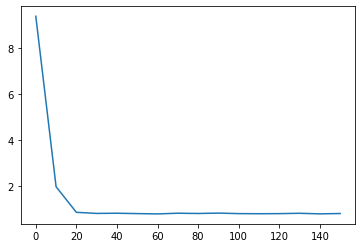

In [196]:
plt.plot(p, costs)
plt.show()

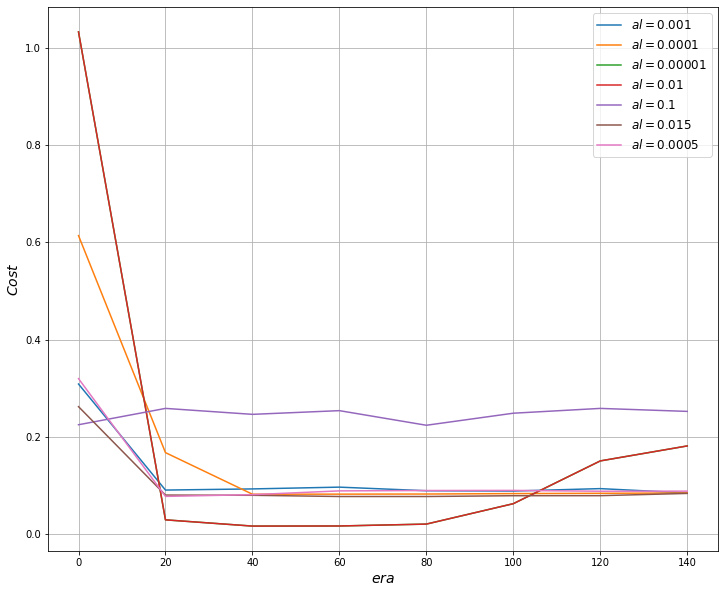

In [197]:
p1 = [0.30900906511274595, 0.09103164281625764, 0.09338935152952355, 0.09704660836628842, 0.08965459986953239, 0.0890208847303362, 0.09400243502839234, 0.08507644355803556]
p2 = [0.6140993532492673, 0.16799418222205675, 0.08249607150123861, 0.0826394619244828, 0.08288322323700781, 0.08378158136254965, 0.08437355678680925, 0.08508383190788571]
p3 = [1.0328501022897794, 0.029807403685645273, 0.0169696876480534, 0.017191807658211378, 0.021078347045174306, 0.06304589481482914, 0.15094511319228343, 0.181746761388379860]
p4 = [1.0328501022897794, 0.029807403685645273, 0.0169696876480534, 0.017191807658211378, 0.021078347045174306, 0.06304589481482914, 0.15094511319228343, 0.18174676138837986]
p5 = [0.22532728686723258, 0.2589014330709676, 0.24667722348840515, 0.2542810356419458, 0.2242467274380907, 0.24902019175051016, 0.2588939298144123, 0.2527583418331334]
p6 = [0.26251674968667993, 0.08075138585465202, 0.08027754137142629, 0.0777842647592244, 0.07777331094641293, 0.07942077471194398, 0.07950112589714653, 0.08413766730111483]
p7 = [0.3201308377030936, 0.07800929546226065, 0.08159222540616007, 0.08935525549842571, 0.09008650710731314, 0.09032520735610472, 0.08861623111768158, 0.08880586291604131]
plt.figure(figsize=(12,10))
plt.plot(p[::2], p1, label=r'$al=0.001$')
plt.plot(p[::2], p2, label=r'$al=0.0001$')
plt.plot(p[::2], p3, label=r'$al=0.00001$')
plt.plot(p[::2], p4, label=r'$al=0.01$')
plt.plot(p[::2], p5, label=r'$al=0.1$')
plt.plot(p[::2], p6, label=r'$al=0.015$')
plt.plot(p[::2], p7, label=r'$al=0.0005$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.xlabel(r'$era$', fontsize=14)
plt.ylabel(r'$Cost$', fontsize=14)
plt.show()


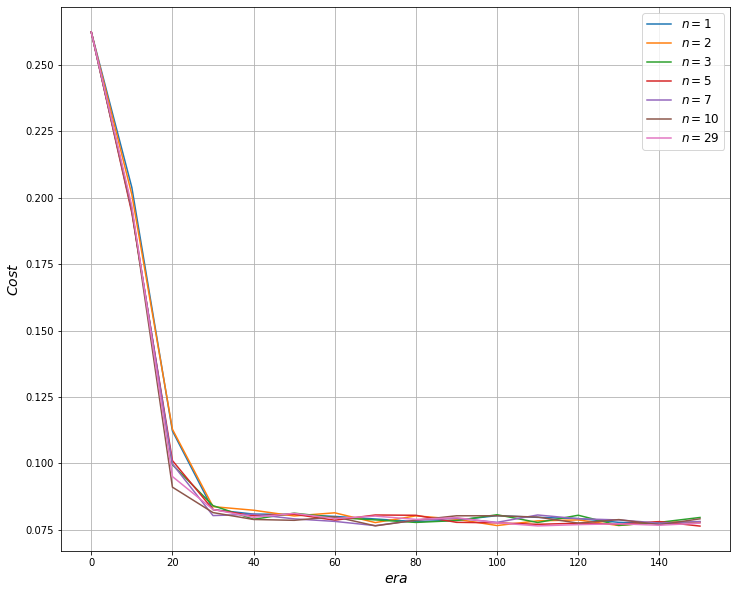

In [198]:
p1 = [0.26251674968667993, 0.2038967527178719, 0.11218460770105376, 0.08253708253685565, 0.08086025022997112, 0.08075138585465202, 0.07998185692465687, 0.07901423886563341, 0.07802628224429853, 0.07855257814226713, 0.08027754137142629, 0.07962641745636012, 0.07918527002686604, 0.07774810887923422, 0.07729683288656397, 0.0777842647592244]
p2 = [0.26251655188429324, 0.20120117320457287, 0.11281305673123465, 0.08366549316174465, 0.08231202104126312, 0.08015209840207915, 0.08133803354816371, 0.07766123488768861, 0.08019248310943095, 0.07892954490792015, 0.07654008840803828, 0.07830708931974195, 0.07866233682830837, 0.076546913239401, 0.07789304735399916, 0.07784145915969054]
p3 = [0.26250656238113346, 0.19509408329273215, 0.09947478110855801, 0.08405109544243106, 0.07891342738998786, 0.08121454023118313, 0.07956467933658717, 0.07867304235192019, 0.07771869769095696, 0.07841645904886341, 0.08061620329395103, 0.07769564971329612, 0.08042246698284283, 0.07662259882049471, 0.07774598307886871, 0.07958324700851471]
p4 = [0.2625112448877519, 0.19432623562021134, 0.10101450459828032, 0.08256159032445165, 0.08024667948394804, 0.08078755128601911, 0.0785545091008435, 0.08052024190433149, 0.08040674027241534, 0.07775059786015182, 0.07756841425109662, 0.07700700278724115, 0.07741593511867828, 0.07709481628457615, 0.07803073571301233, 0.07633631067155622]
p5 = [0.26250620617391496, 0.19546598587415642, 0.09975614637355634, 0.08029259316073045, 0.08080081580760878, 0.07905918640696985, 0.07810688688447875, 0.0765065079344216, 0.0785714527495125, 0.07928405672772332, 0.07774978370920649, 0.08052505292623313, 0.0791047493602357, 0.07864852845735415, 0.07746354421365487, 0.07806612310906469]
p6 = [0.26250466402184536, 0.1958358818173095, 0.09100188281132138, 0.08142051243776938, 0.0788318060386286, 0.07850975910384617, 0.07987296618196704, 0.07642636264176739, 0.07855689653657305, 0.08021962475721256, 0.08022393012375373, 0.07973204820671853, 0.07745767198347009, 0.07878355007455529, 0.07685925954893369, 0.07907215744719398]
p7 = [0.26248969146665124, 0.1968910442357139, 0.09500258484022661, 0.08260640199193903, 0.07965873295786019, 0.08112530494561554, 0.07920149521166642, 0.08010117411271422, 0.07885750887213971, 0.07950395528110454, 0.07757696066566, 0.07640542435161812, 0.07689273797163843, 0.07720130397256653, 0.07666461724954043, 0.07742454818984412]
plt.figure(figsize=(12,10))
plt.plot(p, p1, label=r'$n=1$')
plt.plot(p, p2, label=r'$n=2$')
plt.plot(p, p3, label=r'$n=3$')
plt.plot(p, p4, label=r'$n=5$')
plt.plot(p, p5, label=r'$n=7$')
plt.plot(p, p6, label=r'$n=10$')
plt.plot(p, p7, label=r'$n=29$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.xlabel(r'$era$', fontsize=14)
plt.ylabel(r'$Cost$', fontsize=14)
plt.show()


In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
model_ Auris,6.902227e+12
model_ Avensis,6.902227e+12
model_ Aygo,6.902227e+12
model_ C-HR,6.902227e+12
model_ Camry,6.902227e+12
model_ Corolla,6.902227e+12
model_ GT86,6.902227e+12
model_ Hilux,6.902227e+12
model_ IQ,6.902227e+12
model_ Land Cruiser,6.902227e+12


In [225]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
print('MAPE Test for train = ', np.mean(abs((y_pred_train-Y_train)/y_pred_train)))
print('MAPE Test for test= ', np.mean(abs((y_pred_test-Y_test)/y_pred_test)))

MAPE Test for train =  0.19031305825994504
MAPE Test for test=  0.21724118558694486
